In [1]:
#imports
import tensorflow as tf
import numpy as np
import Set_Gaussian_Data as data
import matplotlib.pyplot as plt

In [2]:
#set number of discrete x values 
input_val = 500
#load input data for gaussian
training = data.create_training_set(1000, input_val) #outputs an array of x_vals, mean values, and sigma values respectively
x_train = training[0] 
y_train = training[1]  
z_train = training[2] 
y_train = np.vstack((y_train, z_train)) #compile training mean and standard deviation into single data structure
y_train = y_train.T #first column as mean, second column as sd

testing = data.create_training_set(300, input_val) 
x_test = testing[0] 
y_test = testing[1] 
z_test = testing[2] 
y_test = np.vstack((y_test, z_test)) #compile test mean and standard deviation into single data structure 
y_test = y_test.T



In [3]:
#set layers
model = tf.keras.models.Sequential() #feed forward
#input layer: 
model.add(tf.keras.layers.Input(input_val,)) 
#hidden layers (2):  
model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
#output layer:
model.add(tf.keras.layers.Dense(2,))


In [4]:
#optimize
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 90) #90 epochs minimizes the difference between test and training and testing cost


Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 1ms/sample - loss: 10.2465 - accuracy: 0.6000
Epoch 2/90
1000/1000 [==============================] - 0s 131us/sample - loss: 132.1903 - accuracy: 0.7170
Epoch 3/90
1000/1000 [==============================] - 0s 128us/sample - loss: 36.8918 - accuracy: 0.7410
Epoch 4/90
1000/1000 [==============================] - 0s 129us/sample - loss: 35.7760 - accuracy: 0.7130
Epoch 5/90
1000/1000 [==============================] - 0s 128us/sample - loss: 50.8159 - accuracy: 0.7370
Epoch 6/90
1000/1000 [==============================] - 0s 132us/sample - loss: 36.2490 - accuracy: 0.6950
Epoch 7/90
1000/1000 [==============================] - 0s 130us/sample - loss: 18.5181 - accuracy: 0.6520
Epoch 8/90
1000/1000 [==============================] - 0s 129us/sample - loss: 6.2766 - accuracy: 0.7680
Epoch 9/90
1000/1000 [==============================] - 0s 127us/sample - loss: 3.8924 - accuracy: 0.8230
Epoch 10/90
1000/1

1000/1000 [==============================] - 0s 134us/sample - loss: 0.0062 - accuracy: 0.9640
Epoch 78/90
1000/1000 [==============================] - 0s 133us/sample - loss: 0.0084 - accuracy: 0.9590
Epoch 79/90
1000/1000 [==============================] - 0s 132us/sample - loss: 0.0101 - accuracy: 0.9650
Epoch 80/90
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0168 - accuracy: 0.9570
Epoch 81/90
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0374 - accuracy: 0.9520
Epoch 82/90
1000/1000 [==============================] - 0s 117us/sample - loss: 0.0730 - accuracy: 0.9260
Epoch 83/90
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0969 - accuracy: 0.9090
Epoch 84/90
1000/1000 [==============================] - 0s 124us/sample - loss: 0.3119 - accuracy: 0.8860
Epoch 85/90
1000/1000 [==============================] - 0s 124us/sample - loss: 0.5066 - accuracy: 0.9160
Epoch 86/90
1000/1000 [==========================

In [6]:
#testing
results = model.evaluate(x = x_test, y = y_test)
val_loss = results[0] #losss
val_acc = results[1] #accuracy 
print(val_loss, val_acc)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015801671907926598 0.97


In [7]:
#saves the model data
model.save('mean_and_sd.model')
new_model = tf.keras.models.load_model('mean_and_sd.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mean_and_sd.model/assets


In [8]:
#makes predictions for all elements in x_test array  
predictions = new_model.predict(x_test) #predicts all means and standard deviations of the x_test dataset


X Input Values: [-1.78008013e-06 -1.99166983e-06 -2.22740180e-06 -2.48990749e-06
 -2.78209071e-06 -3.10715405e-06 -3.46862789e-06 -3.87040190e-06
 -4.31675940e-06 -4.81241475e-06 -5.36255404e-06 -5.97287933e-06
 -6.64965672e-06 -7.39976859e-06 -8.23077020e-06 -9.15095125e-06
 -1.01694024e-05 -1.12960876e-05 -1.25419220e-05 -1.39188568e-05
 -1.54399705e-05 -1.71195675e-05 -1.89732854e-05 -2.10182095e-05
 -2.32729974e-05 -2.57580126e-05 -2.84954689e-05 -3.15095856e-05
 -3.48267543e-05 -3.84757184e-05 -4.24877664e-05 -4.68969383e-05
 -5.17402480e-05 -5.70579217e-05 -6.28936527e-05 -6.92948747e-05
 -7.63130543e-05 -8.40040035e-05 -9.24282137e-05 -1.01651212e-04
 -1.11743942e-04 -1.22783171e-04 -1.34851917e-04 -1.48039917e-04
 -1.62444110e-04 -1.78169158e-04 -1.95328006e-04 -2.14042458e-04
 -2.34443810e-04 -2.56673503e-04 -2.80883825e-04 -3.07238652e-04
 -3.35914227e-04 -3.67099988e-04 -4.00999444e-04 -4.37831089e-04
 -4.77829380e-04 -5.21245752e-04 -5.68349699e-04 -6.19429902e-04
 -6.74795

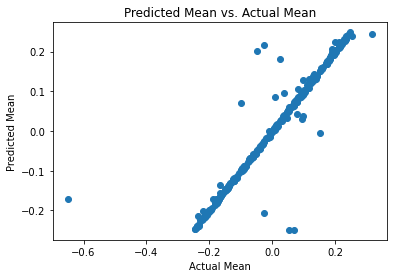

In [9]:
predictions = predictions.T
y_test = y_test.T
#scatter: actual vs. predicted mean
plt.scatter(predictions[0],y_test[0]) #mean
plt.title('Predicted Mean vs. Actual Mean')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.show() 

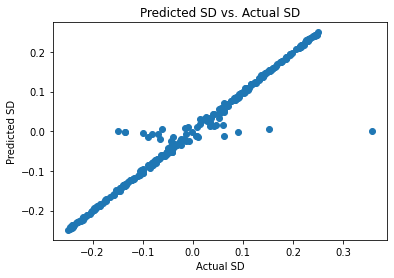

In [10]:
#scatter: actual sd vs. predicted sd
plt.scatter(predictions[1],y_test[1]) #SD
plt.title('Predicted SD vs. Actual SD')
plt.xlabel('Actual SD')
plt.ylabel('Predicted SD')
plt.show()

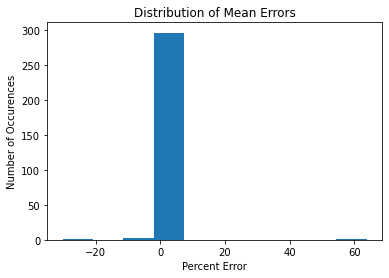

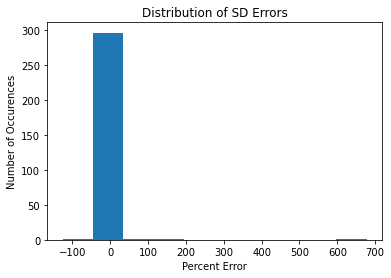

In [12]:
#histogram to represent absolute error between predicted and actual values of each label
plt.hist((predictions[0]-y_test[0]))
plt.title('Distribution of Mean Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Percent Error')
plt.show()
plt.hist((predictions[1]-y_test[1]))
plt.title('Distribution of SD Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Percent Error') 
plt.show() 